In [10]:
import os.path
import sys
sys.path.append("../../")

import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data

import ThinLens.Elements as Elements
import ThinLens.Maps as Maps
from ThinLens.Models import F0D0Model, SIS18_Cell_minimal, SIS18_Cell, \
    SIS18_Lattice_minimal, SIS18_Lattice


load average model

In [2]:
dim = 6
slices = 10
quadSliceMultiplicity = 1
dtype = torch.double
device = torch.device("cpu")
outputPerElement = False  # exceeds outputAtBPM
outputAtBPM = True

# prepare models
Lattice = SIS18_Lattice

model = Lattice(dim=dim, slices=slices, quadSliceMultiplicity=quadSliceMultiplicity,
                dtype=dtype, cellsIdentical=False)

with open("average.json") as file:
    model.loadJSON(file)

check tunes

In [3]:
import tools.madX

print("model tunes: {}".format(model.getTunes()))

madXTunes = tools.madX.tune(model.madX())
print("tunes from Mad-X: {}".format(madXTunes))


model tunes: [0.32682131077398574, 0.2907245244313171]
tunes from Mad-X: [4.32682131077399, 3.29072452443131]


estimate beta-beating

In [4]:
idealModel = Lattice(dim=dim, slices=slices, quadSliceMultiplicity=quadSliceMultiplicity, dtype=dtype)

twiss, idealTwiss = tools.madX.twissTable(model.madX()), tools.madX.twissTable(idealModel.madX())

beta, idealBeta = twiss["betx"], idealTwiss["betx"]

relDiff = (beta - idealBeta) / idealBeta
maxBetaBeat = np.max(np.abs(relDiff)) * 100  # convert to percent
print("{:.2f}%".format(maxBetaBeat))

15.71%


plot beta functions

Text(0, 0.5, 'averaged')

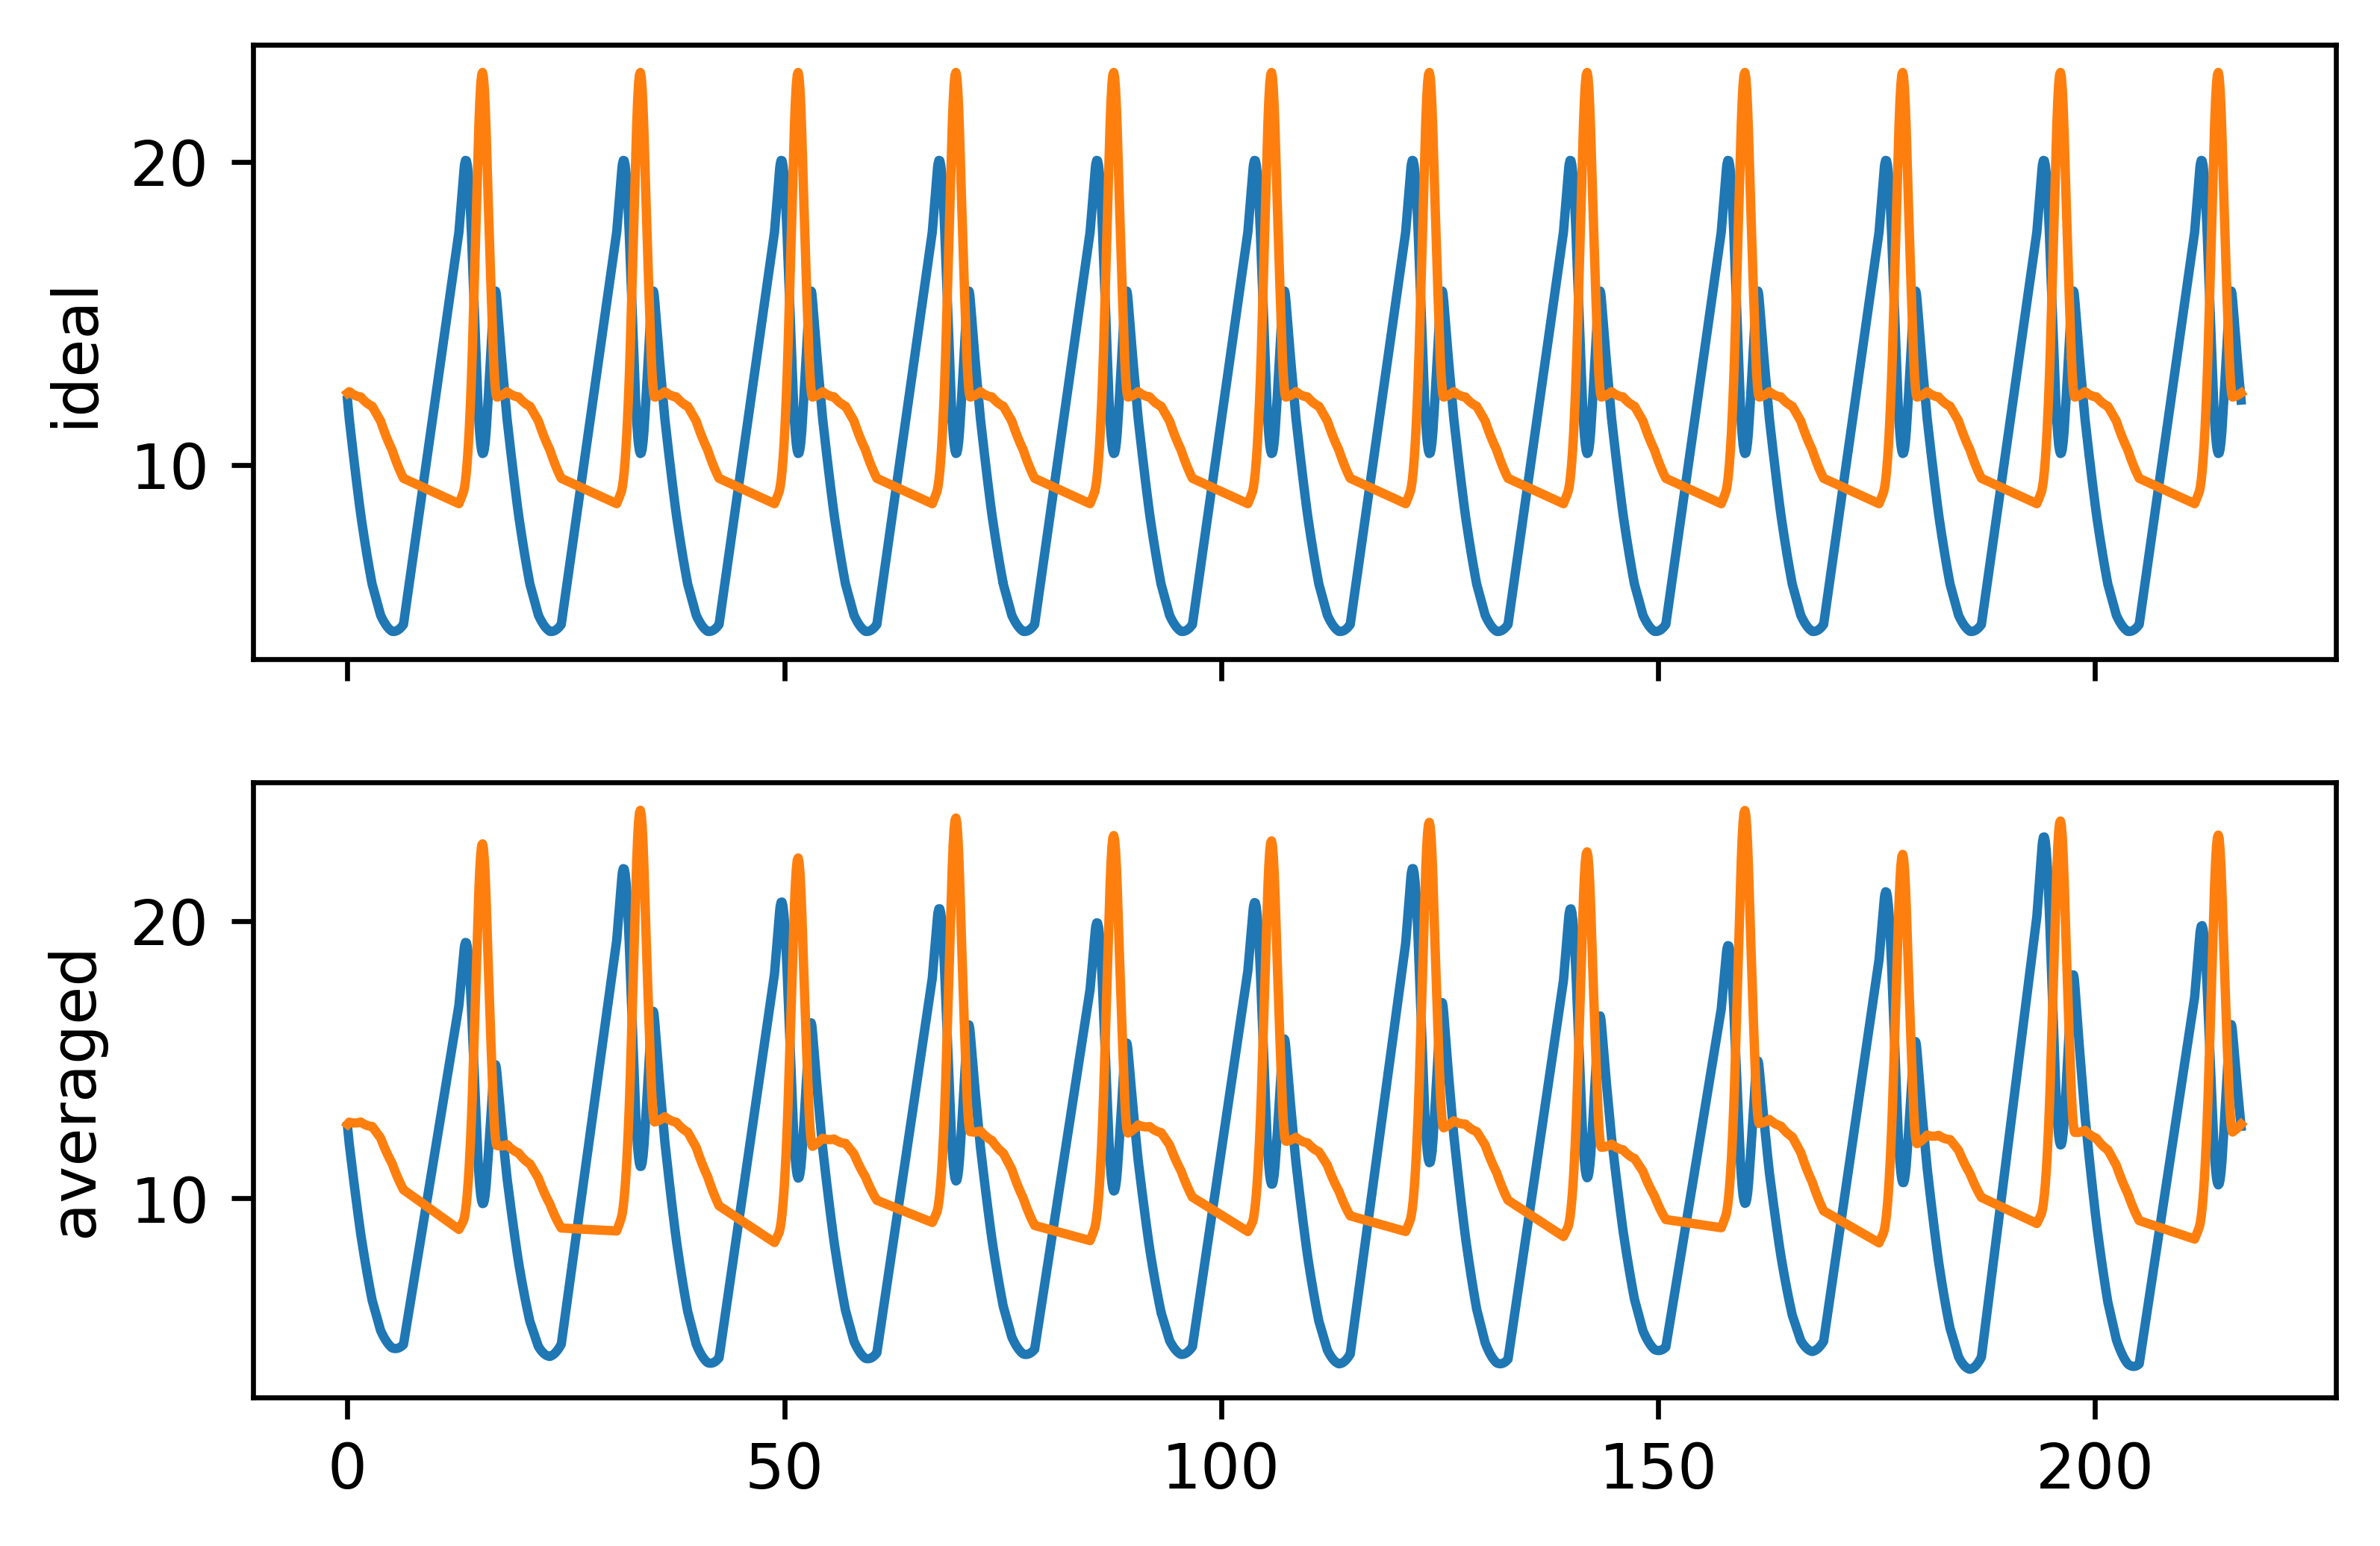

In [11]:
import tools.plot

figBeta, axesBeta = plt.subplots(2, sharex=True)
tools.plot.betaMadX(axesBeta[0], idealModel.madX(), )
axesBeta[0].set_ylabel("ideal")

tools.plot.betaMadX(axesBeta[1], model.madX(), )
axesBeta[1].set_ylabel("averaged")